# How to Train YOLOv7 on a Custom Dataset

This tutorial is based on the [YOLOv7 repository](https://github.com/WongKinYiu/yolov7) by WongKinYiu. This notebook shows training on **your own custom objects**. Many thanks to WongKinYiu and AlexeyAB for putting this repository together.


### **Accompanying Blog Post**

We recommend that you follow along in this notebook while reading the blog post on [how to train YOLOv7](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/), concurrently.

### **Steps Covered in this Tutorial**

To train our detector we take the following steps:

* Install YOLOv7 dependencies
* Load custom dataset from Roboflow in YOLOv7 format
* Run YOLOv7 training
* Evaluate YOLOv7 performance
* Run YOLOv7 inference on test images
* OPTIONAL: Deployment
* OPTIONAL: Active Learning


### Preparing a Custom Dataset

In this tutorial, we will utilize an open source computer vision dataset from one of the 90,000+ available on [Roboflow Universe](https://universe.roboflow.com).

If you already have your own images (and, optionally, annotations), you can convert your dataset using [Roboflow](https://roboflow.com), a set of tools developers use to build better computer vision models quickly and accurately. 100k+ developers use roboflow for (automatic) annotation, converting dataset formats (like to YOLOv7), training, deploying, and improving their datasets/models.

Follow [the getting started guide here](https://docs.roboflow.com/quick-start) to create and prepare your own custom dataset.

#Install Dependencies

_(Remember to choose GPU in Runtime if not already selected. Runtime --> Change Runtime Type --> Hardware accelerator --> GPU)_

In [10]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/HitGobba/yolov7
%cd yolov7
#!pip install -r requirements.txt

C:\Users\Utilizador\Desktop\nova ims\tese\yolov7\yolov7\yolov7


Cloning into 'yolov7'...


# Download Correctly Formatted Custom Data

Next, we'll download our dataset in the right format. Use the `YOLOv7 PyTorch` export. Note that this model requires YOLO TXT annotations, a custom YAML file, and organized directories. The roboflow export writes this for us and saves it in the correct spot.


In [6]:
# HARDHAT (vibe check)


from roboflow import Roboflow
rf = Roboflow(api_key="IBJPvhowQdR4XahkSWaP")
project = rf.workspace("thing-hasep").project("hard-hat-sample-fexvo")
dataset = project.version(2).download("yolov7")

SyntaxError: invalid syntax (1214205012.py, line 3)

In [7]:
# BLUEBERY

#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="IBJPvhowQdR4XahkSWaP")
project = rf.workspace("thing-hasep").project("blueberries_batch")
dataset = project.version(3).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to blueberries_batch-3 in yolov7pytorch:: 100%|██████| 122/122 [00:00<00:00, 589.38it/s]


# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [13]:
# download COCO starting checkpoint
#%cd /content/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
# run this cell to begin training
#%cd /content/yolov7
!python train.py --batch-size 16 --epochs 250 --data {dataset.location}/data.yaml --weights 'yolov7_training.pt' --adam --device 0 


usage: train.py [-h] [--weights WEIGHTS] [--cfg CFG] [--data DATA] [--hyp HYP]
                [--epochs EPOCHS] [--batch-size BATCH_SIZE]
                [--img-size IMG_SIZE [IMG_SIZE ...]] [--rect]
                [--resume [RESUME]] [--nosave] [--notest] [--noautoanchor]
                [--evolve] [--bucket BUCKET] [--cache-images]
                [--image-weights] [--device DEVICE] [--multi-scale]
                [--single-cls] [--adam] [--sync-bn] [--local_rank LOCAL_RANK]
                [--workers WORKERS] [--project PROJECT] [--entity ENTITY]
                [--name NAME] [--exist-ok] [--quad] [--linear-lr]
                [--label-smoothing LABEL_SMOOTHING] [--upload_dataset]
                [--bbox_interval BBOX_INTERVAL] [--save_period SAVE_PERIOD]
                [--artifact_alias ARTIFACT_ALIAS]
                [--freeze FREEZE [FREEZE ...]] [--v5-metric]
train.py: error: unrecognized arguments: ims\tese\yolov7\yolov7\blueberries_batch-3/data.yaml


# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [5]:
# Run evaluation
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.1 --source {dataset.location}/test/images


usage: detect.py [-h] [--weights WEIGHTS [WEIGHTS ...]] [--source SOURCE]
                 [--img-size IMG_SIZE] [--conf-thres CONF_THRES]
                 [--iou-thres IOU_THRES] [--device DEVICE] [--view-img]
                 [--save-txt] [--save-conf] [--nosave]
                 [--classes CLASSES [CLASSES ...]] [--agnostic-nms]
                 [--augment] [--update] [--project PROJECT] [--name NAME]
                 [--exist-ok] [--no-trace]
detect.py: error: unrecognized arguments: ims\tese\yolov7\yolov7\blueberries_batch-3/test/images


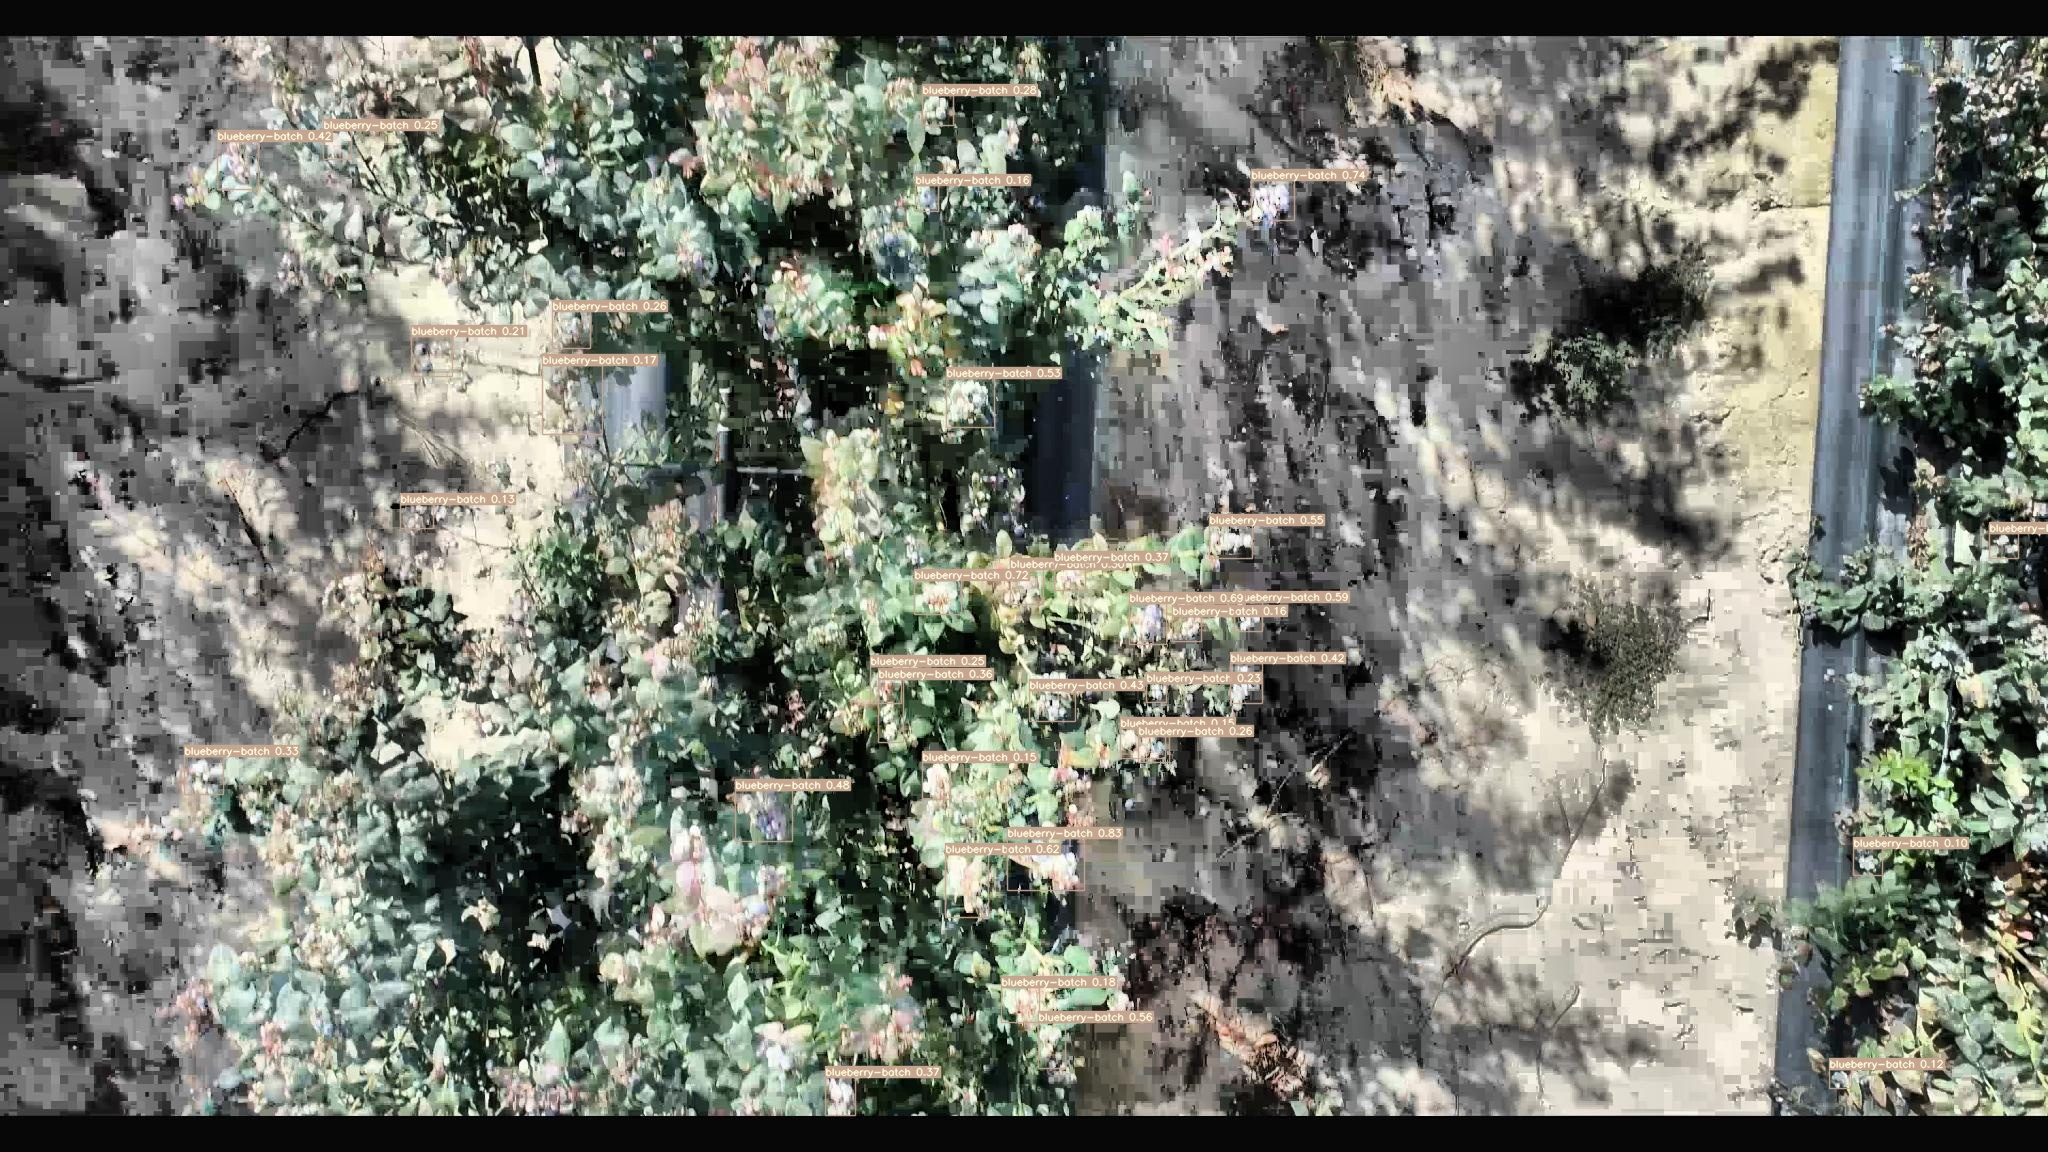

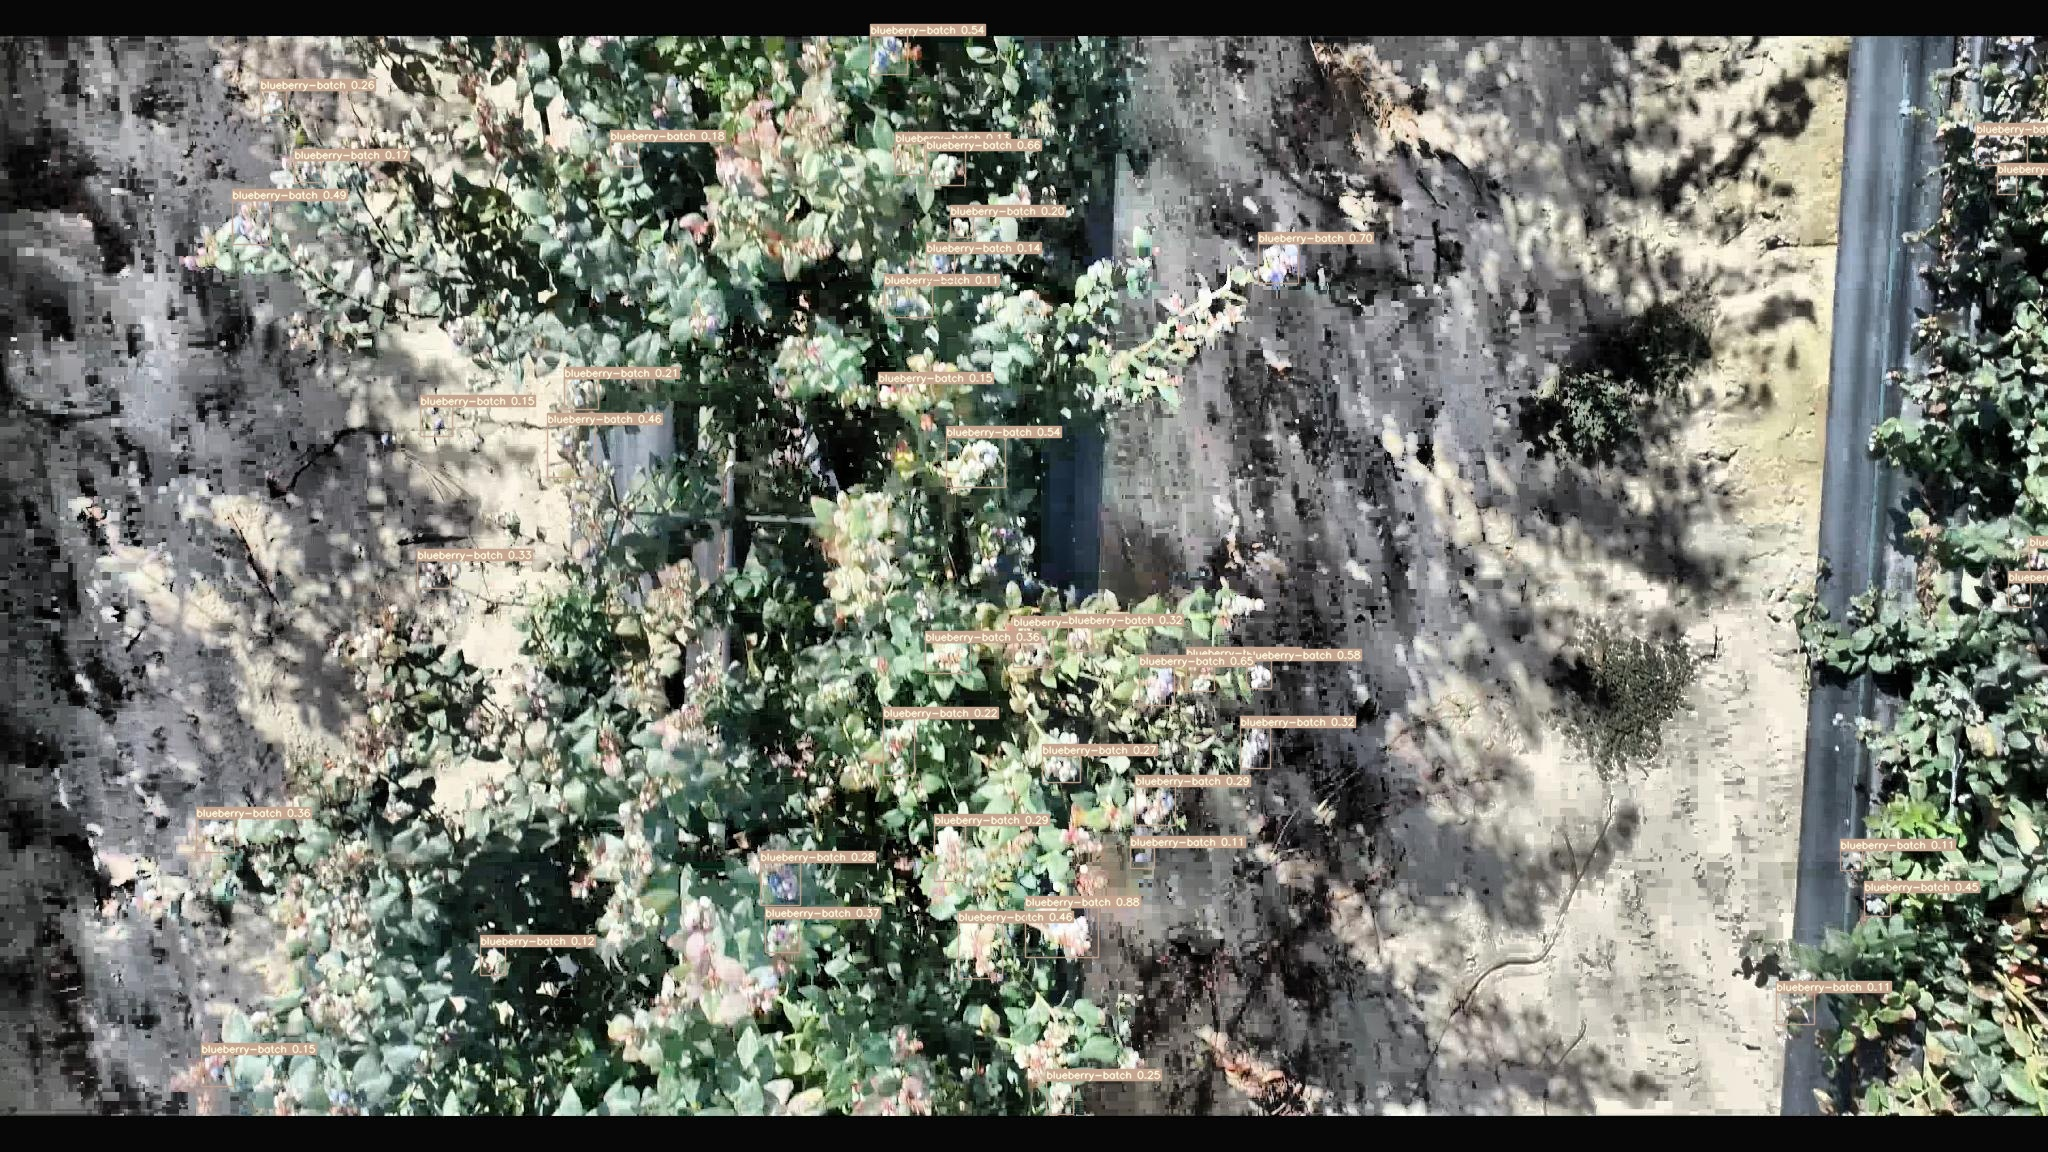

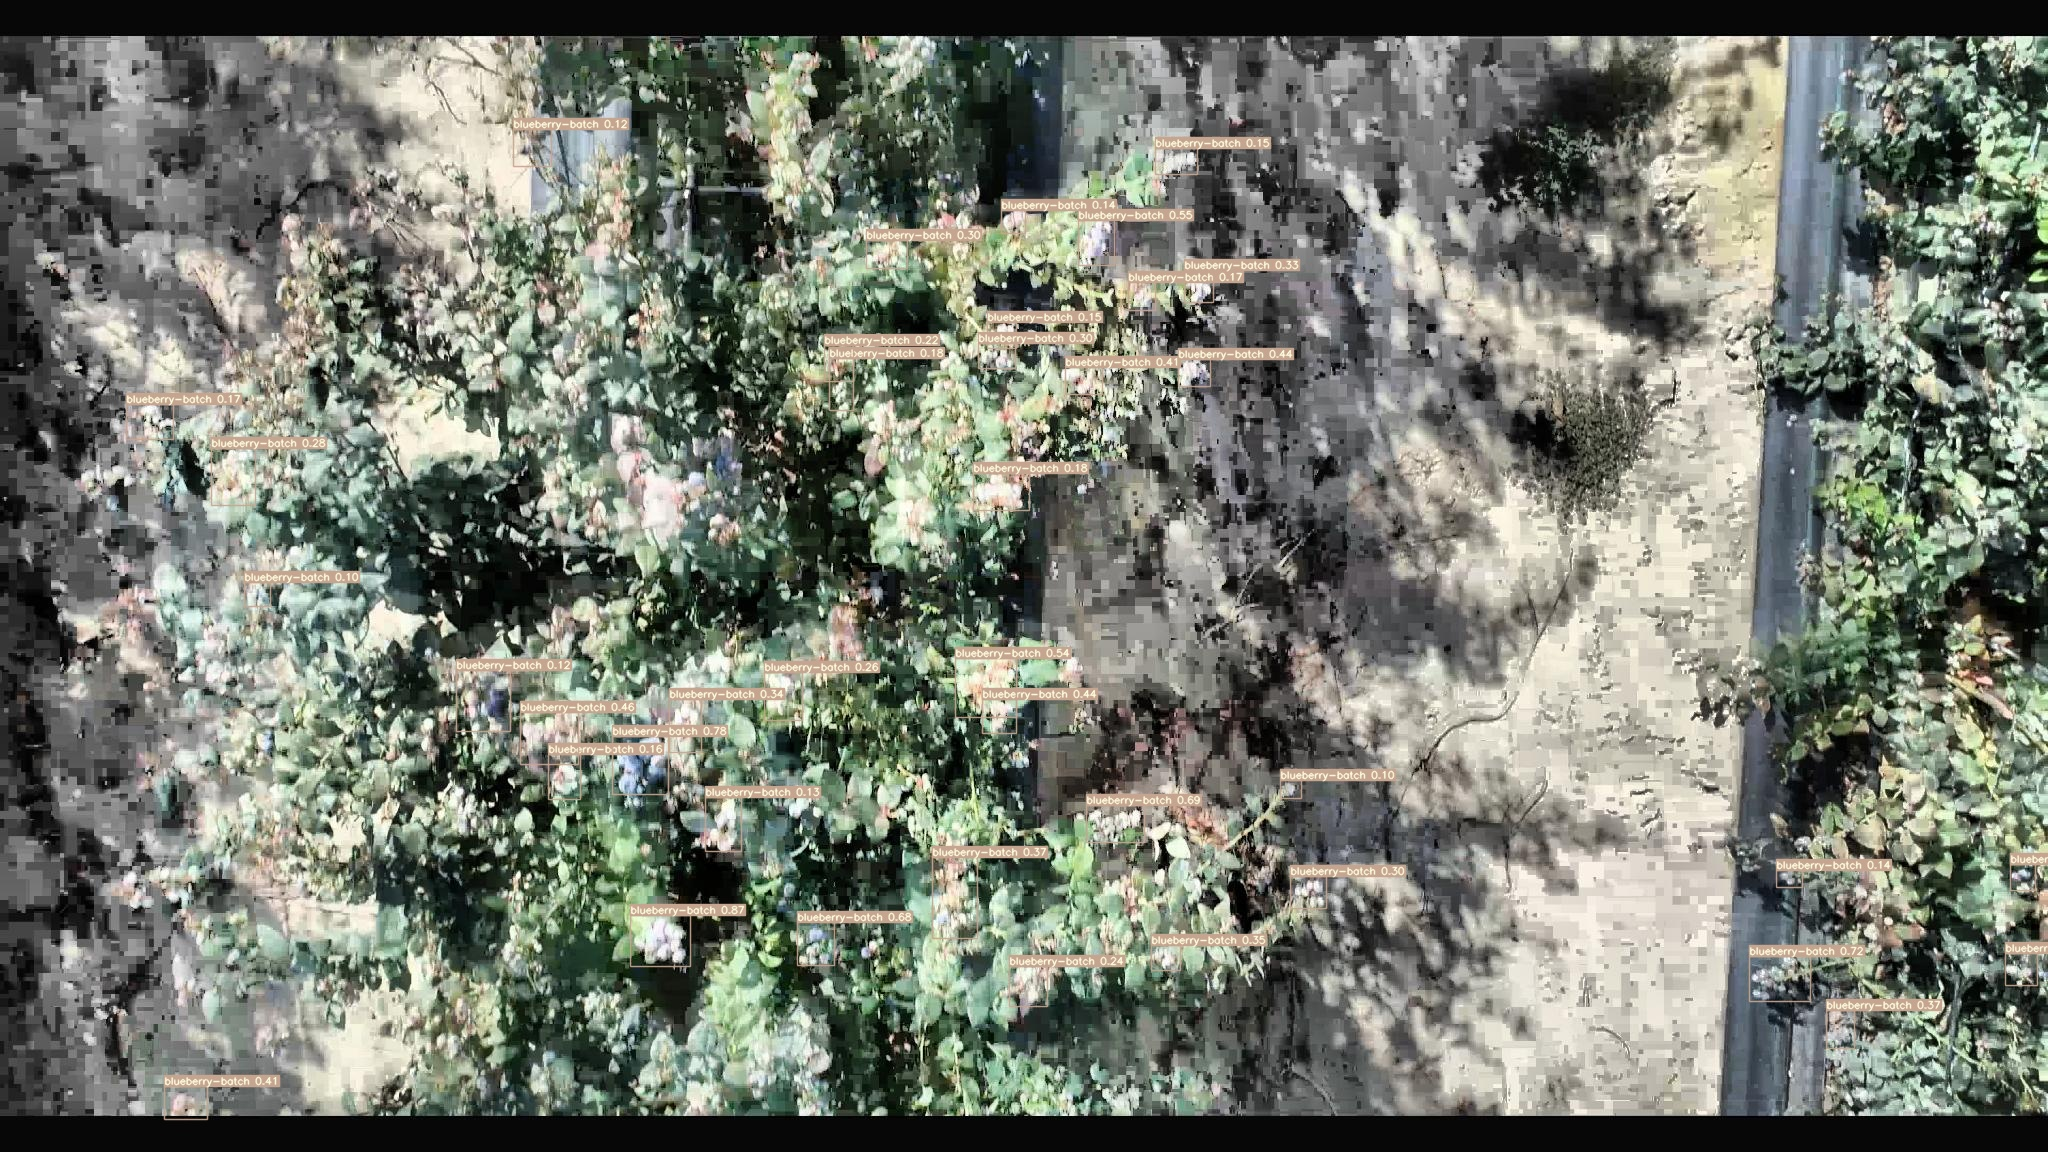

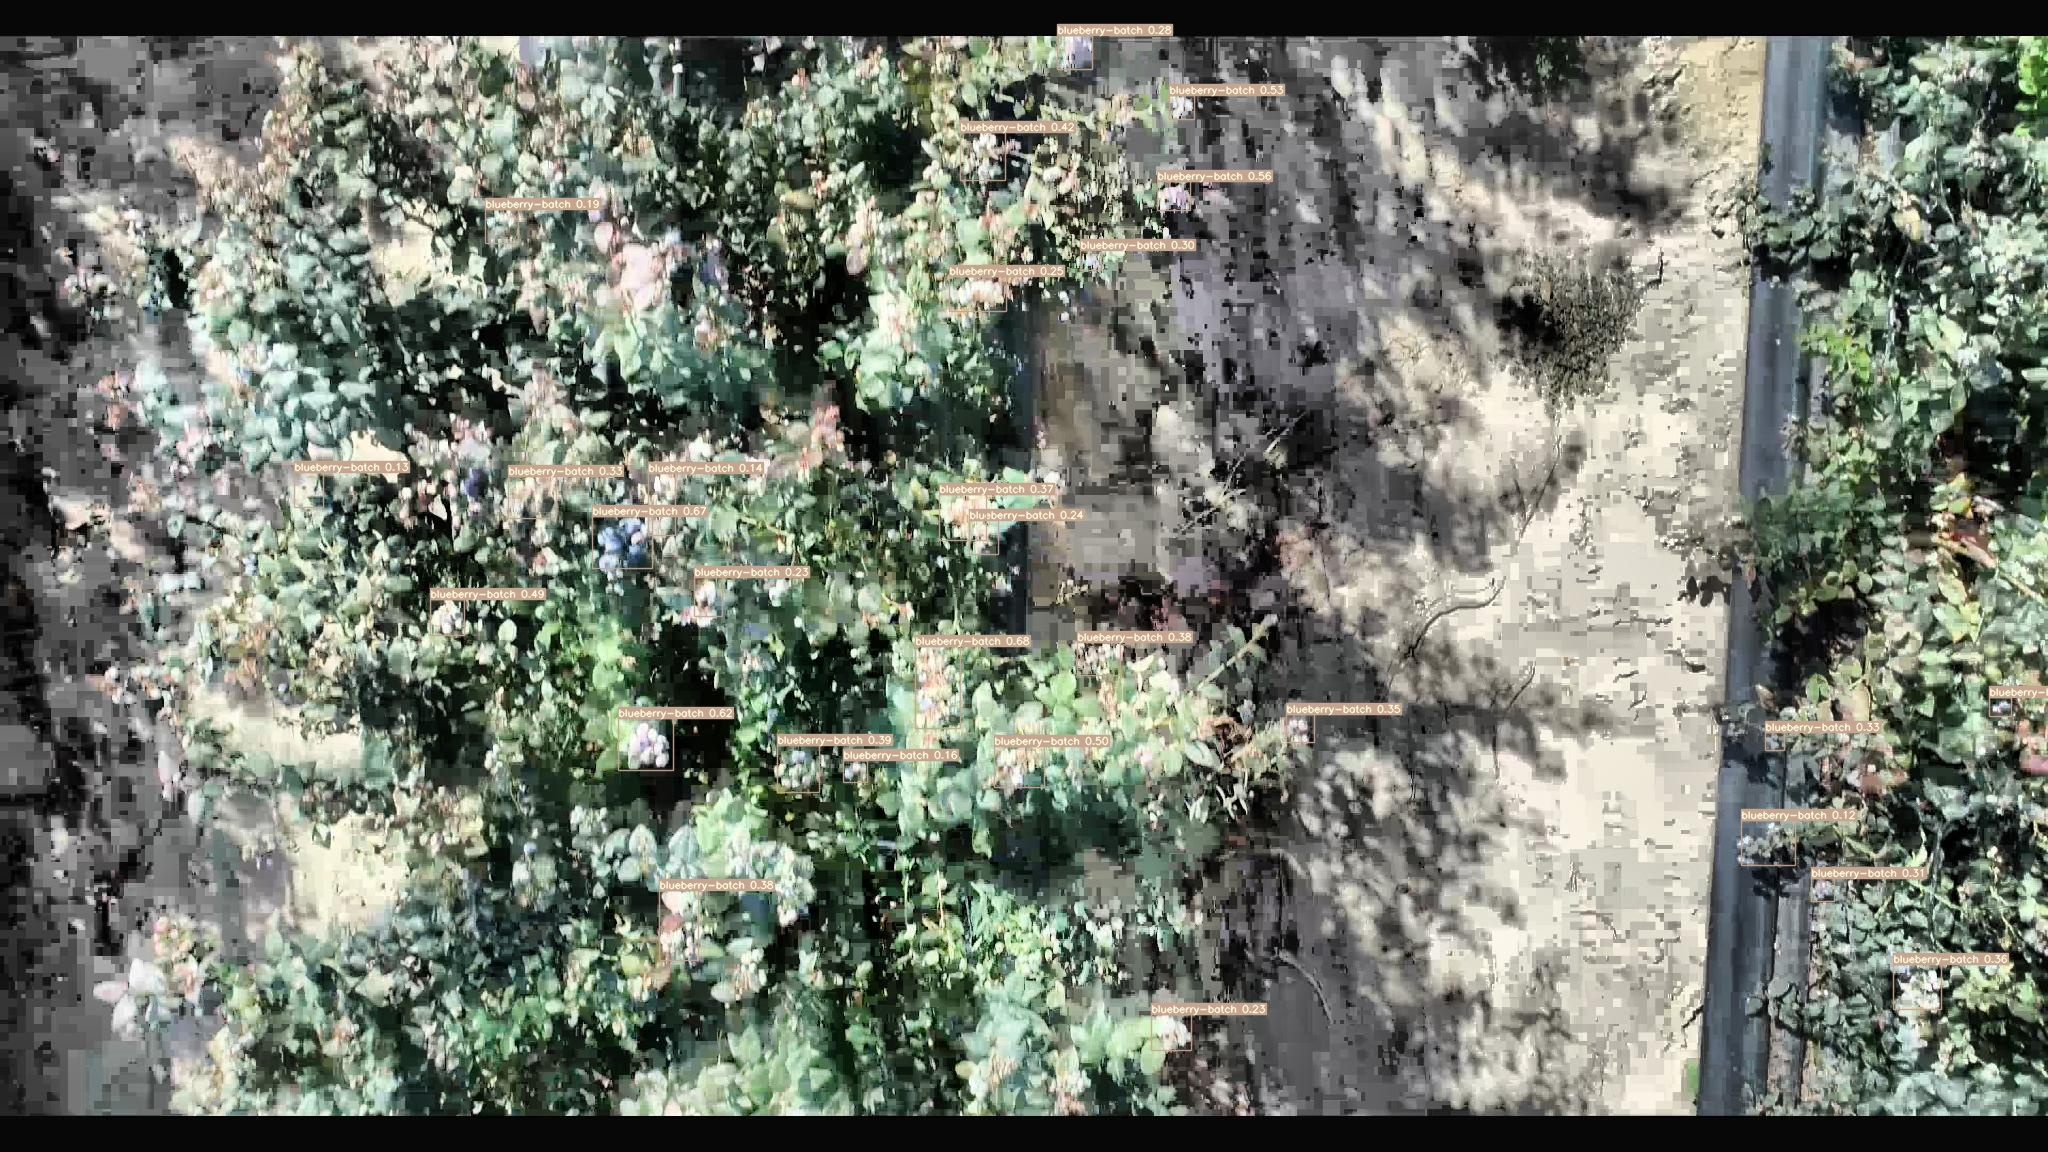

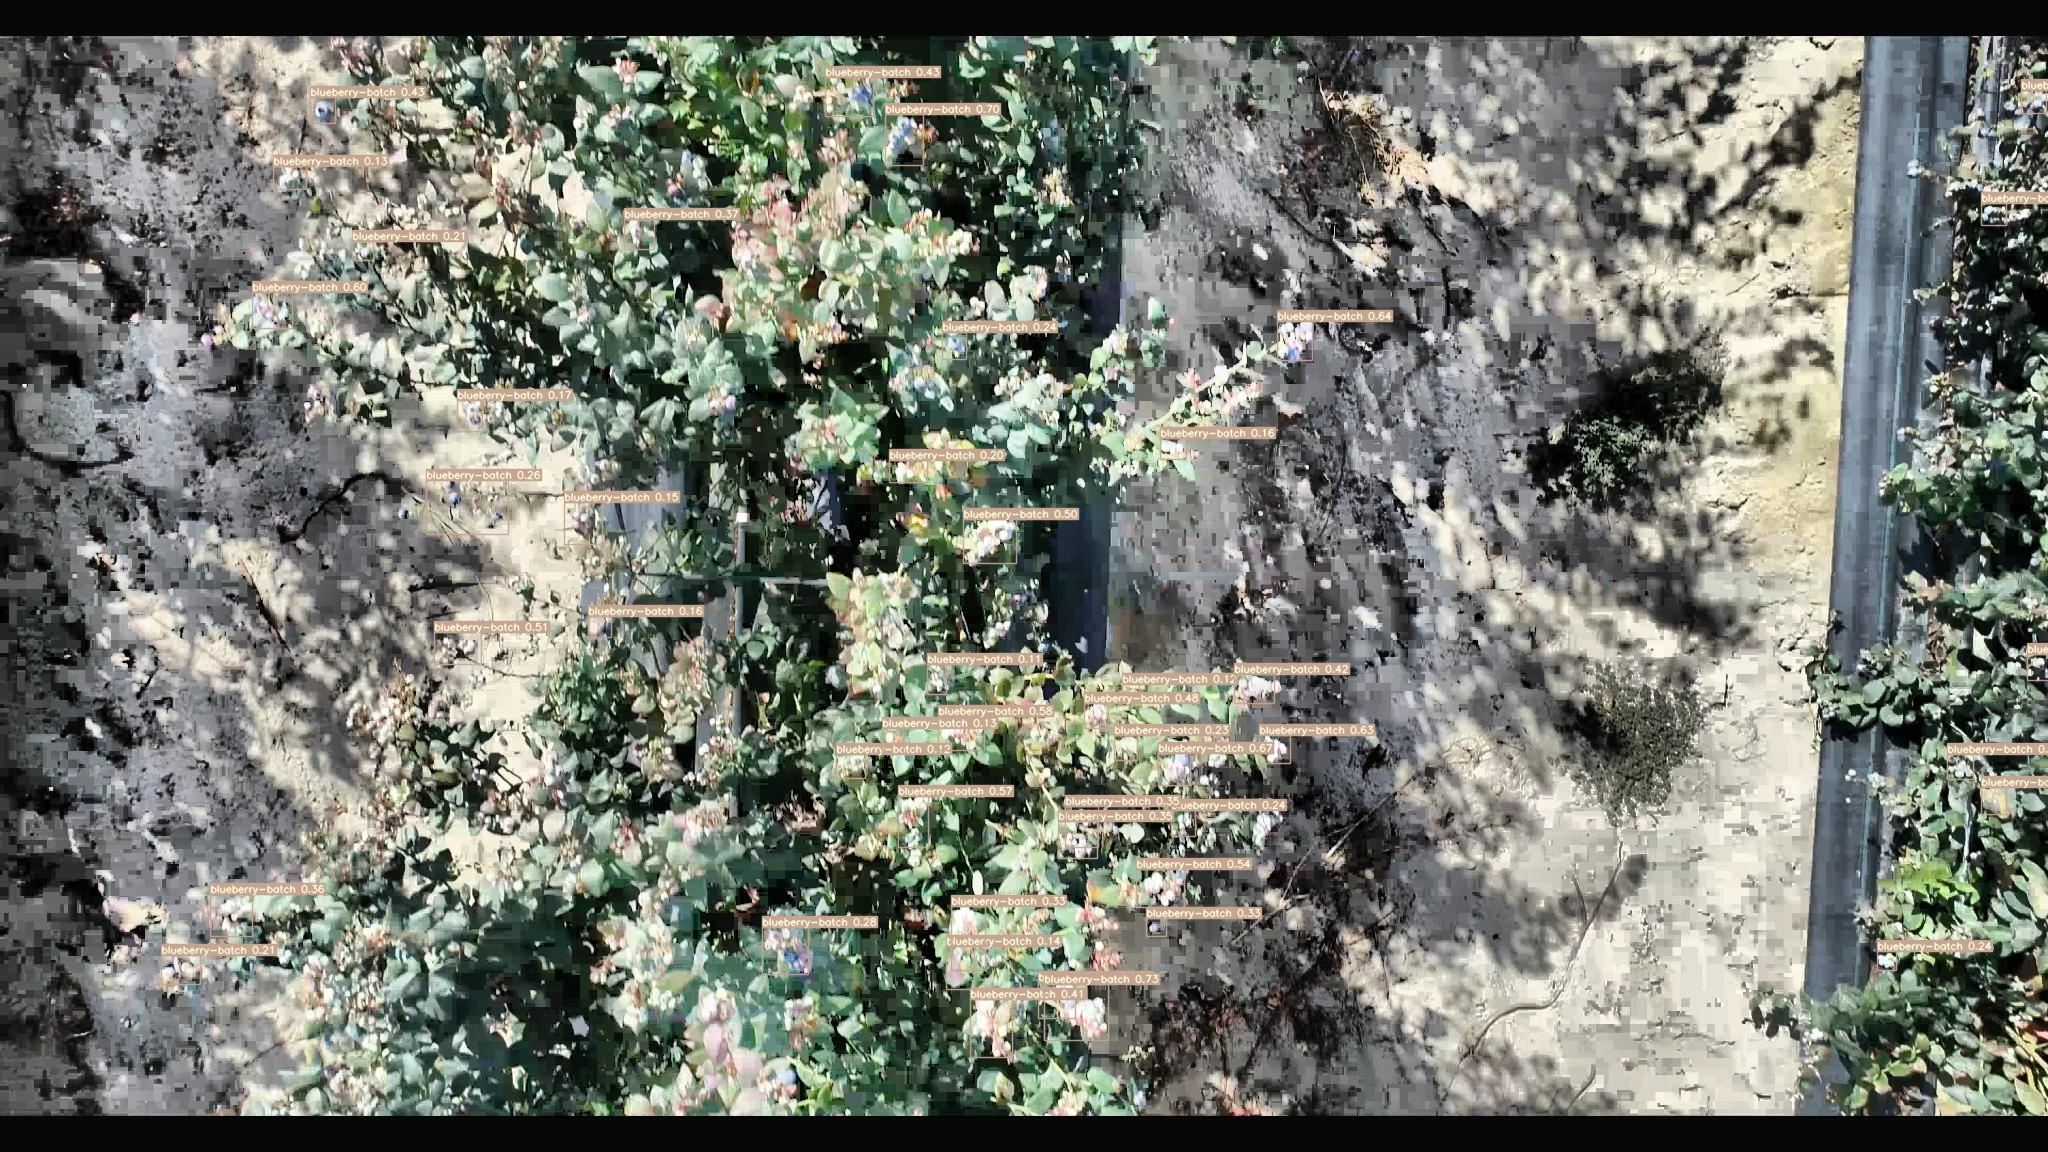

In [ ]:

#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
      print("\n")
    i = i + 1
    

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [ ]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp/weights/best.pt
!zip export.zip runs/train/exp/*

  adding: runs/detect/ (stored 0%)
  adding: runs/detect/exp/ (stored 0%)
  adding: runs/detect/exp/DATA_A_Prime_mp4-19_jpg.rf.e39bad8343cb1df07b0b9309b4519bd2.jpg (deflated 5%)
  adding: runs/detect/exp/DATA_A_Prime_mp4-15_jpg.rf.05a06679ab57fb09c3a4fc7c53da8dd9.jpg (deflated 5%)
  adding: runs/detect/exp/DATA_A_Prime_mp4-39_jpg.rf.1aea44e23c83d2a24c897770671686fc.jpg (deflated 5%)
  adding: runs/detect/exp/DATA_A_Prime_mp4-49_jpg.rf.4911f27162d8daa3af507ec655aef181.jpg (deflated 5%)
  adding: runs/detect/exp/DATA_A_Prime_mp4-10_jpg.rf.97deafd9292ebaa30e51661ef893f022.jpg (deflated 5%)
  adding: runs/train/exp/weights/best.pt (deflated 8%)
  adding: runs/train/exp/confusion_matrix.png (deflated 35%)
  adding: runs/train/exp/events.out.tfevents.1671102499.8c45f68a1e82.175.0 (deflated 71%)
  adding: runs/train/exp/F1_curve.png (deflated 20%)
  adding: runs/train/exp/hyp.yaml (deflated 44%)
  adding: runs/train/exp/opt.yaml (deflated 46%)
  adding: runs/train/exp/P_curve.png (deflated 18

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
rf = Roboflow(api_key="IBJPvhowQdR4XahkSWaP")                               # used above to load data
inference_project =  rf.workspace("thing-hasep").project("blueberries_batch")    # used above to load data
model = inference_project.version(3).model

upload_project = rf.workspace("thing-hasep").project("blueberries_batch")

print("inference reference point: ", inference_project)
print("upload destination: ", upload_project)

loading Roboflow workspace...
loading Roboflow project...
loading Roboflow workspace...
loading Roboflow project...
inference reference point:  {
  "name": "blueberries_batch",
  "type": "object-detection",
  "workspace": "thing-hasep"
}
upload destination:  {
  "name": "blueberries_batch",
  "type": "object-detection",
  "workspace": "thing-hasep"
}


In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it 

confidence_interval = [10,65]                                   # [lower_bound_percent, upper_bound_percent]

for prediction in predictions:                                  # predictions list to loop through
  if(prediction['confidence'] * 100 >= confidence_interval[0] and 
          prediction['confidence'] * 100 <= confidence_interval[1]):
        
          # upload on success!
    print(' >> image uploaded!')
    upload_project.upload(image, num_retry_uploads=3)     # upload image in question

NameError: ignored

# Next steps

Congratulations, you've trained a custom YOLOv7 model! Next, start thinking about deploying and [building an MLOps pipeline](https://docs.roboflow.com) so your model gets better the more data it sees in the wild.